# **NETFLIX BUSINESS CASE**

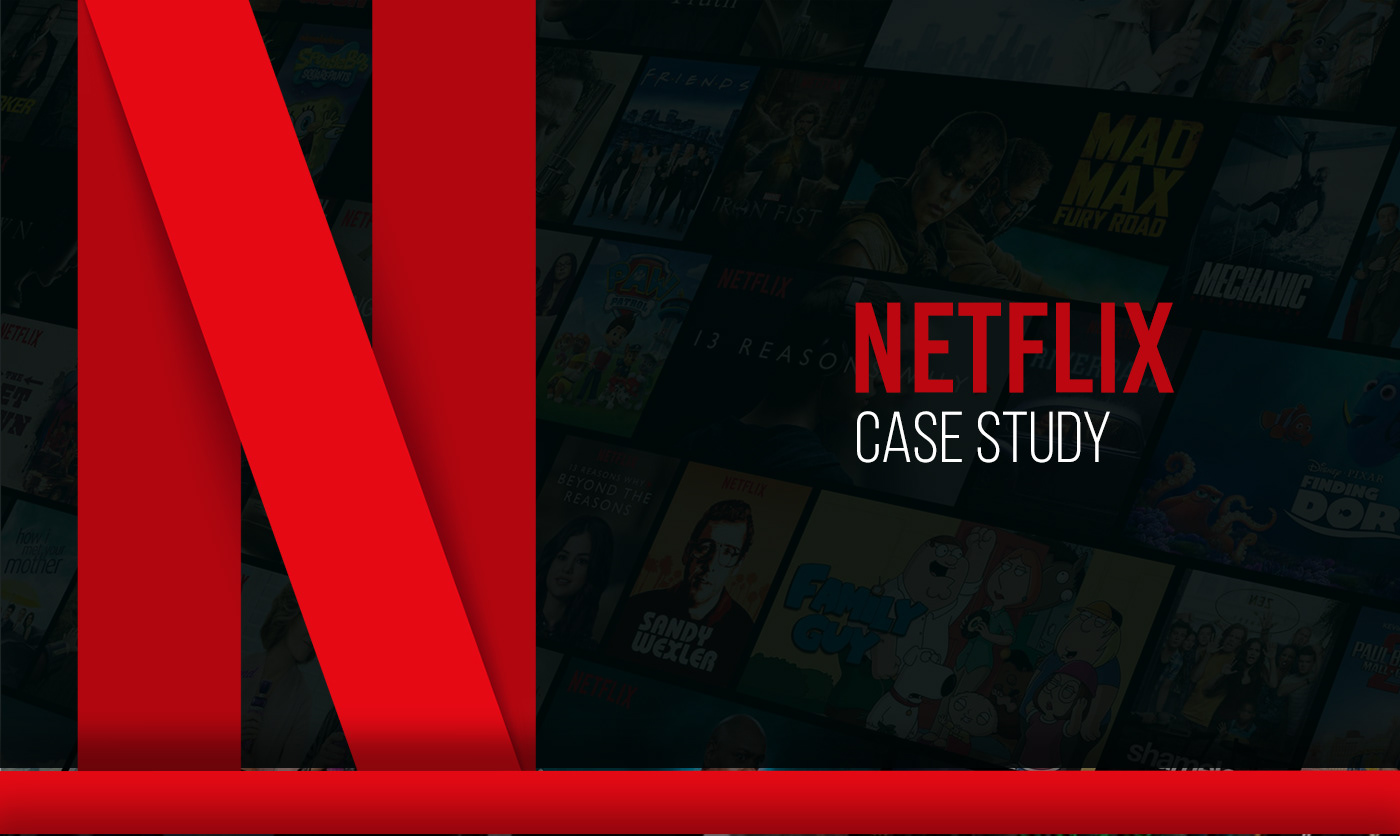

### Netflix is one of the most popular media and video streaming platforms. They have over 10000 movies or tv shows available on their platform, as of mid-2021, they have over 222M Subscribers globally. This tabular dataset consists of listings of all the movies and tv shows available on Netflix, along with details such as - cast, directors, ratings, release year, duration, etc.

# 1) PROBLEM STATEMENT & BASIC METRICS

### <font color = red> **PROBLEM STATEMENT** - </font>
### <font color = red> Analyze the data and generate insights that could help Netflix in deciding which type of shows/movies to produce and how they can grow the business in different countries.</font>

### Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### Loading Dataset

In [3]:
df = pd.read_csv("netflix_business_case.csv")

In [4]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [11]:
df.info() # information of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [12]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [13]:
df.nunique() # unique values of all the attributes 

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

# 2) BASIC OBSERVATIONS

In [6]:
df.shape # shape of the data

(8807, 12)

In [8]:
df.describe() # statistical summary of the data

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [9]:
df.describe(include = "object") # description of string columns

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,3207,1793,362,4


In [17]:
df.dtypes # data types of all the attributes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [10]:
df.isna().sum() # missing/null value detection

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [9]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Rajiv Chilaka,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Rajiv Chilaka,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Rajiv Chilaka,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
# conversion of categorical attributes to 'category'
df["date_added"] = pd.to_datetime(df["date_added"],format = '%B %d, %Y',errors = "coerce")
df =df.astype({"type" : "category", "rating" : "category"})
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# 3) DATA CLEANING

In [6]:
df.isna().sum() # finding sum of null values

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        98
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [5]:
df['director'] = df['director'].fillna(df['director'].mode()[0]) # filling null values of the column "director" with it's mode



In [6]:
df['cast'] = df['cast'].fillna(df['cast'].mode()[0]) # filling null values of the column "cast" with it's mode

In [7]:
df['country'] = df['country'].fillna(df['country'].mode()[0])# filling null values of the column "country" with it's mode


In [33]:
df.head() # After replacing null vlaues with mode


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,David Attenborough,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Rajiv Chilaka,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Rajiv Chilaka,David Attenborough,United States,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Rajiv Chilaka,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [8]:
# Finding the mode duration for movies and TV shows
movie_duration_mode = df.loc[df['type'] == 'Movie', 'duration'].mode()[0]
tv_duration_mode = df.loc[df['type'] == 'TV Show', 'duration'].mode()[0]

# Filling missing duration values based on the type of content
df['duration'] = df.apply(lambda x: movie_duration_mode if x['type'] == 'Movie' 
                          and pd.isna(x['duration'])
                          else tv_duration_mode if x['type'] == 'TV Show' 
                          and pd.isna(x['duration'])
                          else x['duration'], axis=1)


In [35]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,David Attenborough,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Rajiv Chilaka,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Rajiv Chilaka,David Attenborough,United States,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Rajiv Chilaka,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [9]:
# dropping any remaining rows with missing values to ensure a clean dataset for analysis
df.dropna(inplace=True)

### Non-Graphical Analysis: Value counts and unique attributes

In [10]:
# value counts of director column
df['director'].value_counts() 




director
Rajiv Chilaka                     2557
Raúl Campos, Jan Suter              18
Marcus Raboy                        16
Suhas Kadav                         16
Jay Karas                           14
                                  ... 
Raymie Muzquiz, Stu Livingston       1
Joe Menendez                         1
Eric Bross                           1
Will Eisenberg                       1
Mozez Singh                          1
Name: count, Length: 4523, dtype: int64

In [11]:
# value counts of country column
df["country"].value_counts()

country
United States                   3604
India                            971
United Kingdom                   403
Japan                            240
South Korea                      195
                                ... 
Philippines, United States         1
Romania, Bulgaria, Hungary         1
Uruguay, Guatemala                 1
France, Senegal, Belgium           1
United Arab Emirates, Jordan       1
Name: count, Length: 745, dtype: int64

In [12]:
df["type"].value_counts(normalize=True)*100


type
Movie      70.407812
TV Show    29.592188
Name: proportion, dtype: float64

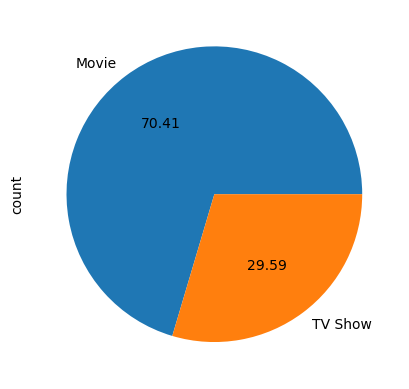

In [13]:
df['type'].value_counts().plot(kind='pie',autopct="%.2f")
plt.show()

#### Insight - We found that in our dataset we have 70.41% movies & 29.59% TV shows


In [14]:
df["rating"].value_counts()

rating
TV-MA       3183
TV-14       2133
TV-PG        838
R            799
PG-13        490
TV-Y7        330
TV-Y         300
PG           287
TV-G         212
NR            78
G             41
TV-Y7-FV       5
UR             3
NC-17          3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64

#### Insight - We have highest rating in TV-MA that means it is suitable for matured audience only & not for children under 17.

In [15]:
# list of unique ratings
df['rating'].unique().tolist()


['PG-13',
 'TV-MA',
 'PG',
 'TV-14',
 'TV-PG',
 'TV-Y',
 'TV-Y7',
 'R',
 'TV-G',
 'G',
 'NC-17',
 '74 min',
 '84 min',
 '66 min',
 'NR',
 'TV-Y7-FV',
 'UR']

In [36]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,David Attenborough,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Rajiv Chilaka,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Rajiv Chilaka,David Attenborough,United States,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Rajiv Chilaka,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [16]:
df['cast'].value_counts()


cast
David Attenborough                                                                                                                                                   836
Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jigna Bhardwaj, Rajesh Kava, Mousam, Swapnil                                                                               14
Samuel West                                                                                                                                                           10
Jeff Dunham                                                                                                                                                            7
Kevin Hart                                                                                                                                                             6
                                                                                                                                                      

#### Insight - In our dataset the actor David Attenborough has made maximum number of content(Movies/TV shows) that is 836.


### Making data ready to use


In [17]:
# Title + cast
# split the cast nested column
constraint=df['cast'].apply(lambda x: str(x).split(', ')).tolist()


In [18]:
df_cast=pd.DataFrame(constraint,index=df['title'])


In [19]:
df_cast=df_cast.stack()


In [20]:
df_cast=pd.DataFrame(df_cast)


In [21]:
df_cast.reset_index(inplace=True)

In [22]:
df_cast=df_cast[['title',0]] 


In [23]:
df_cast.columns=['title','cast']



In [35]:
# this data for Title with cast is ready
df_cast.head()
     

,title,cast
0,Dick Johnson Is Dead,David Attenborough
1,Blood & Water,Ama Qamata
2,Blood & Water,Khosi Ngema
3,Blood & Water,Gail Mabalane
4,Blood & Water,Thabang Molaba


In [24]:
# Title + Director
# split the director nested column
constraint=df['director'].apply(lambda x: str(x).split(', ')).tolist()


In [25]:
df_director=pd.DataFrame(constraint,index=df['title']) 

In [26]:
df_director=df_director.stack()

In [27]:
df_director=pd.DataFrame(df_director)

In [28]:
df_director.reset_index(inplace=True)

In [29]:
df_director=df_director[['title',0]] 

In [30]:
df_director.columns=['title','director']

In [31]:
df_director.head()


,title,director
0,Dick Johnson Is Dead,Kirsten Johnson
1,Blood & Water,Rajiv Chilaka
2,Ganglands,Julien Leclercq
3,Jailbirds New Orleans,Rajiv Chilaka
4,Kota Factory,Rajiv Chilaka


In [32]:
# Title + country
# split the country nested column
constraint=df['country'].apply(lambda x: str(x).split(', ')).tolist() 

In [33]:
df_country=pd.DataFrame(constraint,index=df['title'])

In [34]:
df_country=df_country.stack() 


In [35]:
df_country=pd.DataFrame(df_country)

In [36]:
df_country.reset_index(inplace=True)

In [37]:
df_country=df_country[['title',0]] 

In [38]:
df_country.columns=['title','country'] 

In [39]:
df_country.head()

,title,country
0,Dick Johnson Is Dead,United States
1,Blood & Water,South Africa
2,Ganglands,United States
3,Jailbirds New Orleans,United States
4,Kota Factory,India


In [40]:
# Title + listed_in
# split the listed_in nested column
constraint=df['listed_in'].apply(lambda x: str(x).split(', ')).tolist()


In [41]:
df_listed_in=pd.DataFrame(constraint,index=df['title']) 

In [42]:
df_listed_in=df_listed_in.stack() 

In [43]:
df_listed_in=pd.DataFrame(df_listed_in)


In [44]:
df_listed_in.reset_index(inplace=True)


In [45]:
df_listed_in=df_listed_in[['title',0]] 

In [46]:
df_listed_in.columns=['title','listed_in']

In [47]:
df_listed_in.head() 


,title,listed_in
0,Dick Johnson Is Dead,Documentaries
1,Blood & Water,International TV Shows
2,Blood & Water,TV Dramas
3,Blood & Water,TV Mysteries
4,Ganglands,Crime TV Shows


In [48]:
df1 = df_cast.merge(df_director,on = "title",how = "inner") 

In [49]:
df1.head() 

,title,cast,director
0,Dick Johnson Is Dead,David Attenborough,Kirsten Johnson
1,Blood & Water,Ama Qamata,Rajiv Chilaka
2,Blood & Water,Khosi Ngema,Rajiv Chilaka
3,Blood & Water,Gail Mabalane,Rajiv Chilaka
4,Blood & Water,Thabang Molaba,Rajiv Chilaka


In [50]:
df2 = df1.merge(df_country,on = "title") 

In [51]:
df2.head()  

,title,cast,director,country
0,Dick Johnson Is Dead,David Attenborough,Kirsten Johnson,United States
1,Blood & Water,Ama Qamata,Rajiv Chilaka,South Africa
2,Blood & Water,Khosi Ngema,Rajiv Chilaka,South Africa
3,Blood & Water,Gail Mabalane,Rajiv Chilaka,South Africa
4,Blood & Water,Thabang Molaba,Rajiv Chilaka,South Africa


In [52]:
df3 = df2.merge(df_listed_in,on = "title")  

In [53]:
df3.head()  

,title,cast,director,country,listed_in
0,Dick Johnson Is Dead,David Attenborough,Kirsten Johnson,United States,Documentaries
1,Blood & Water,Ama Qamata,Rajiv Chilaka,South Africa,International TV Shows
2,Blood & Water,Ama Qamata,Rajiv Chilaka,South Africa,TV Dramas
3,Blood & Water,Ama Qamata,Rajiv Chilaka,South Africa,TV Mysteries
4,Blood & Water,Khosi Ngema,Rajiv Chilaka,South Africa,International TV Shows


In [54]:
data_sorted = df[["show_id","title","type","date_added","rating","duration",]]
data_sorted.head()  


,show_id,title,type,date_added,rating,duration
0,s1,Dick Johnson Is Dead,Movie,2021-09-25,PG-13,90 min
1,s2,Blood & Water,TV Show,2021-09-24,TV-MA,2 Seasons
2,s3,Ganglands,TV Show,2021-09-24,TV-MA,1 Season
3,s4,Jailbirds New Orleans,TV Show,2021-09-24,TV-MA,1 Season
4,s5,Kota Factory,TV Show,2021-09-24,TV-MA,2 Seasons


In [55]:
df_final=data_sorted.merge(df3,on="title")
df_final.head()

,show_id,title,type,date_added,rating,duration,cast,director,country,listed_in
0,s1,Dick Johnson Is Dead,Movie,2021-09-25,PG-13,90 min,David Attenborough,Kirsten Johnson,United States,Documentaries
1,s2,Blood & Water,TV Show,2021-09-24,TV-MA,2 Seasons,Ama Qamata,Rajiv Chilaka,South Africa,International TV Shows
2,s2,Blood & Water,TV Show,2021-09-24,TV-MA,2 Seasons,Ama Qamata,Rajiv Chilaka,South Africa,TV Dramas
3,s2,Blood & Water,TV Show,2021-09-24,TV-MA,2 Seasons,Ama Qamata,Rajiv Chilaka,South Africa,TV Mysteries
4,s2,Blood & Water,TV Show,2021-09-24,TV-MA,2 Seasons,Khosi Ngema,Rajiv Chilaka,South Africa,International TV Shows


In [56]:
df_final["duration_fixed"]=df_final['duration'].str.split(' ').str.get(0)
df_final.drop('duration',axis=1,inplace=True)
df_final.head() 

,show_id,title,type,date_added,rating,cast,director,country,listed_in,duration_fixed
0,s1,Dick Johnson Is Dead,Movie,2021-09-25,PG-13,David Attenborough,Kirsten Johnson,United States,Documentaries,90
1,s2,Blood & Water,TV Show,2021-09-24,TV-MA,Ama Qamata,Rajiv Chilaka,South Africa,International TV Shows,2
2,s2,Blood & Water,TV Show,2021-09-24,TV-MA,Ama Qamata,Rajiv Chilaka,South Africa,TV Dramas,2
3,s2,Blood & Water,TV Show,2021-09-24,TV-MA,Ama Qamata,Rajiv Chilaka,South Africa,TV Mysteries,2
4,s2,Blood & Water,TV Show,2021-09-24,TV-MA,Khosi Ngema,Rajiv Chilaka,South Africa,International TV Shows,2


In [57]:
df_final['release_year']=df_final["date_added"].dt.year 


In [58]:
df_final.head()

,show_id,title,type,date_added,rating,cast,director,country,listed_in,duration_fixed,release_year
0,s1,Dick Johnson Is Dead,Movie,2021-09-25,PG-13,David Attenborough,Kirsten Johnson,United States,Documentaries,90,2021
1,s2,Blood & Water,TV Show,2021-09-24,TV-MA,Ama Qamata,Rajiv Chilaka,South Africa,International TV Shows,2,2021
2,s2,Blood & Water,TV Show,2021-09-24,TV-MA,Ama Qamata,Rajiv Chilaka,South Africa,TV Dramas,2,2021
3,s2,Blood & Water,TV Show,2021-09-24,TV-MA,Ama Qamata,Rajiv Chilaka,South Africa,TV Mysteries,2,2021
4,s2,Blood & Water,TV Show,2021-09-24,TV-MA,Khosi Ngema,Rajiv Chilaka,South Africa,International TV Shows,2,2021


In [59]:
df_final.tail()

,show_id,title,type,date_added,rating,cast,director,country,listed_in,duration_fixed,release_year
200173,s8807,Zubaan,Movie,2019-03-02,TV-14,Anita Shabdish,Mozez Singh,India,International Movies,111,2019
200174,s8807,Zubaan,Movie,2019-03-02,TV-14,Anita Shabdish,Mozez Singh,India,Music & Musicals,111,2019
200175,s8807,Zubaan,Movie,2019-03-02,TV-14,Chittaranjan Tripathy,Mozez Singh,India,Dramas,111,2019
200176,s8807,Zubaan,Movie,2019-03-02,TV-14,Chittaranjan Tripathy,Mozez Singh,India,International Movies,111,2019
200177,s8807,Zubaan,Movie,2019-03-02,TV-14,Chittaranjan Tripathy,Mozez Singh,India,Music & Musicals,111,2019


In [60]:
df_final.shape

(200178, 11)

In [115]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200178 entries, 0 to 200177
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   show_id         200178 non-null  object        
 1   title           200178 non-null  object        
 2   type            200178 non-null  category      
 3   date_added      200178 non-null  datetime64[ns]
 4   rating          200178 non-null  category      
 5   cast            200178 non-null  object        
 6   director        200178 non-null  object        
 7   country         200178 non-null  object        
 8   listed_in       200178 non-null  object        
 9   release_year    200178 non-null  int32         
 10  duration_fixed  200178 non-null  object        
dtypes: category(2), datetime64[ns](1), int32(1), object(7)
memory usage: 13.4+ MB


In [121]:
df_final.isnull().sum()

show_id           0
title             0
type              0
date_added        0
rating            0
cast              0
director          0
country           0
listed_in         0
release_year      0
duration_fixed    0
dtype: int64

In [117]:
df_final.describe()


,date_added,release_year
count,200178,200178.000000
mean,2019-06-24 22:27:52.727272704,2018.979483
min,2008-01-01 00:00:00,2008.000000
25%,2018-07-01 00:00:00,2018.000000
50%,2019-09-14 00:00:00,2019.000000
75%,2020-09-15 00:00:00,2020.000000
max,2021-09-25 00:00:00,2021.000000
std,NaN,1.544928


In [118]:
df_final.describe(include = object)


,show_id,title,cast,director,country,listed_in,duration_fixed
count,200178,200178,200178,200178,200178,200178,200178
unique,8705,8705,36130,4988,127,42,210
top,s7165,Kahlil Gibran's The Prophet,David Attenborough,Rajiv Chilaka,United States,Dramas,1
freq,700,700,2237,49059,70564,29768,34961


#### Inisghts -
#### 1)Kahlil Gibran's The Prophet is the top most movie
#### 2)Rajiv chilaka is top Director
#### 3)David Attenborough is top cast
#### 4)United State is top country

In [61]:
df["type"].value_counts(normalize=True)*100 

type
Movie      70.407812
TV Show    29.592188
Name: proportion, dtype: float64

In [62]:
# Total number 2431.9 hr and 935.8 hr duration of movies and Tv shows available in netflix
show=df_final[['type','duration_fixed']].groupby('type').count()
print(show) 

         duration_fixed
type                   
Movie            145834
TV Show           54344


In [63]:
date_median=df_final["date_added"].median() 

In [64]:
df_final["date_added"].fillna(date_median,inplace=True)

In [65]:
df_final.rename(columns = {"listed_in":"listed"},inplace = True)

In [66]:
df_final.head()

,show_id,title,type,date_added,rating,cast,director,country,listed,duration_fixed,release_year
0,s1,Dick Johnson Is Dead,Movie,2021-09-25,PG-13,David Attenborough,Kirsten Johnson,United States,Documentaries,90,2021
1,s2,Blood & Water,TV Show,2021-09-24,TV-MA,Ama Qamata,Rajiv Chilaka,South Africa,International TV Shows,2,2021
2,s2,Blood & Water,TV Show,2021-09-24,TV-MA,Ama Qamata,Rajiv Chilaka,South Africa,TV Dramas,2,2021
3,s2,Blood & Water,TV Show,2021-09-24,TV-MA,Ama Qamata,Rajiv Chilaka,South Africa,TV Mysteries,2,2021
4,s2,Blood & Water,TV Show,2021-09-24,TV-MA,Khosi Ngema,Rajiv Chilaka,South Africa,International TV Shows,2,2021


In [67]:
# Oldest and Newest date of show added on netflix
df_final.agg({"date_added":["min",'max']})

,date_added
min,2008-01-01
max,2021-09-25


#### Insight - Netflix has first added the content on platform on 2008-01-01 & latest added content was on 2021-09-25

In [68]:
df_final.groupby("listed")['listed'].count().sort_values(ascending=False)


listed
Dramas                          29768
International Movies            28211
Comedies                        20829
International TV Shows          12593
Action & Adventure              12216
Independent Movies               9834
Children & Family Movies         9771
TV Dramas                        8628
Thrillers                        7107
Romantic Movies                  6412
TV Comedies                      4710
Crime TV Shows                   4590
Horror Movies                    4571
Kids' TV                         4447
Sci-Fi & Fantasy                 4037
Music & Musicals                 3077
Romantic TV Shows                2978
Documentaries                    2407
Anime Series                     2247
TV Action & Adventure            2194
Spanish-Language TV Shows        2017
British TV Shows                 1691
Sports Movies                    1531
Classic Movies                   1434
TV Mysteries                     1249
Korean TV Shows                  1101
Cult 

#### Insight - Netflix has most number of Dramas, International movies, comedies shows listed in Top-3 listed program

In [69]:
grouped=df_final.groupby('type')['show_id']
unique_show=grouped.apply(lambda x: x.nunique())
unique_show

type
Movie      6129
TV Show    2576
Name: show_id, dtype: int64

#### Insight- Out of 8807 show :Total 6129 movies and 2576 Tv show available in Netflix

# 4. Visual Analysis - Univariate, Bivariate after pre-processing of the data

### Univariate Analysis

In [70]:
df_dt = df_final
df_dt['year_added'] = df_final.date_added.dt.year
df_dt['month_added'] = df_final.date_added.dt.month
df_dt['day_added'] = df_final.date_added.dt.day_name()
df_dt

,show_id,title,type,date_added,rating,cast,director,country,listed,duration_fixed,release_year,year_added,month_added,day_added
0,s1,Dick Johnson Is Dead,Movie,2021-09-25,PG-13,David Attenborough,Kirsten Johnson,United States,Documentaries,90,2021,2021,9,Saturday
1,s2,Blood & Water,TV Show,2021-09-24,TV-MA,Ama Qamata,Rajiv Chilaka,South Africa,International TV Shows,2,2021,2021,9,Friday
2,s2,Blood & Water,TV Show,2021-09-24,TV-MA,Ama Qamata,Rajiv Chilaka,South Africa,TV Dramas,2,2021,2021,9,Friday
3,s2,Blood & Water,TV Show,2021-09-24,TV-MA,Ama Qamata,Rajiv Chilaka,South Africa,TV Mysteries,2,2021,2021,9,Friday
4,s2,Blood & Water,TV Show,2021-09-24,TV-MA,Khosi Ngema,Rajiv Chilaka,South Africa,International TV Shows,2,2021,2021,9,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200173,s8807,Zubaan,Movie,2019-03-02,TV-14,Anita Shabdish,Mozez Singh,India,International Movies,111,2019,2019,3,Saturday
200174,s8807,Zubaan,Movie,2019-03-02,TV-14,Anita Shabdish,Mozez Singh,India,Music & Musicals,111,2019,2019,3,Saturday
200175,s8807,Zubaan,Movie,2019-03-02,TV-14,Chittaranjan Tripathy,Mozez Singh,India,Dramas,111,2019,2019,3,Saturday
200176,s8807,Zubaan,Movie,2019-03-02,TV-14,Chittaranjan Tripathy,Mozez Singh,India,International Movies,111,2019,2019,3,Saturday


### Countplot

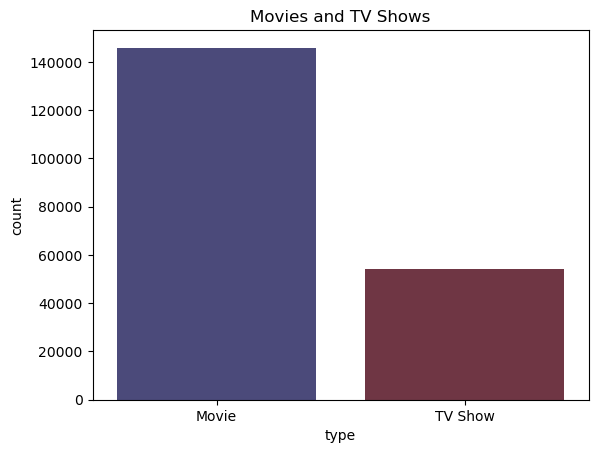

In [71]:
sns.countplot(x='type',data=df_dt,palette = "icefire")
plt.title('Movies and TV Shows')
plt.show()

#### Insight - From the above plot we can say that Netflix has more number of movies as compared to TV shows.

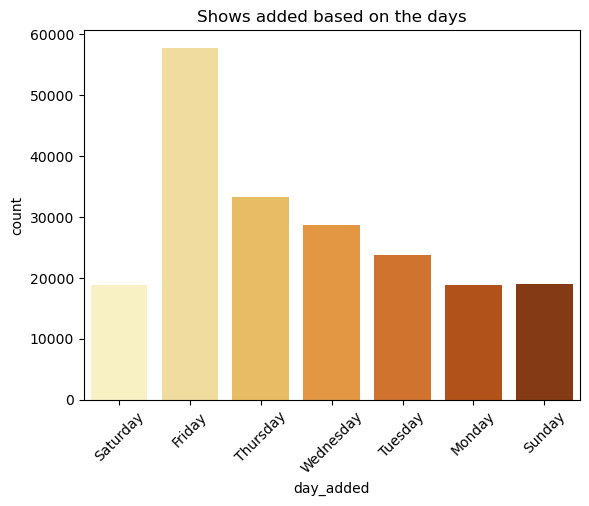

In [72]:
sns.countplot(x='day_added',data=df_dt,palette = "YlOrBr")
plt.title('Shows added based on the days')
plt.xticks(rotation = 45)
plt.show()

#### Insight - Netflix has added maximum amount of content on Friday.

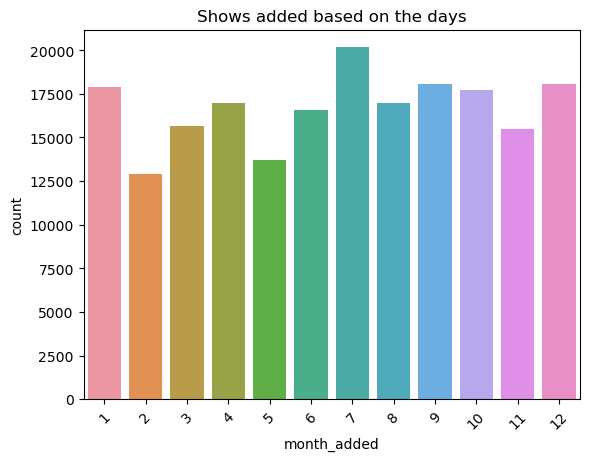

In [73]:
sns.countplot(x='month_added',data=df_dt)
plt.title('Shows added based on the days')
plt.xticks(rotation = 45)
plt.show() 

#### Insight - Netlix has added more amount on content in the month of july.

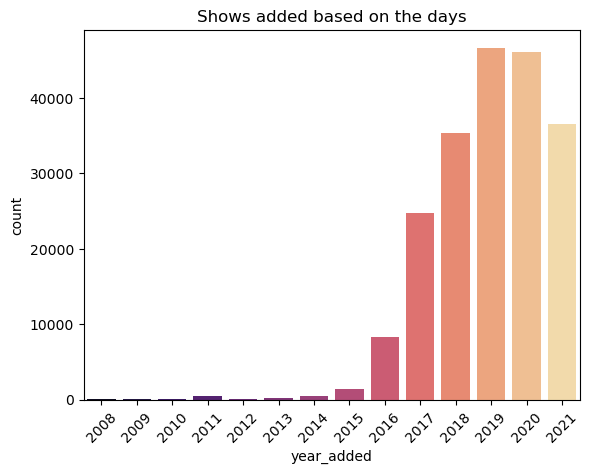

In [74]:
sns.countplot(x='year_added',data=df_dt,palette = "magma")
plt.title('Shows added based on the days')
plt.xticks(rotation = 45)
plt.show()

#### Insight - Netlix has added maximum amount on content in the year 2019.

### Histogram

In [75]:
# Top 5 duration
top_5_durations = df_dt['duration_fixed'].value_counts().head(5).index

# Filter the DataFrame to include only rows with top 5 durations
filtered_data = df_dt[df_dt['duration_fixed'].isin(top_5_durations)]


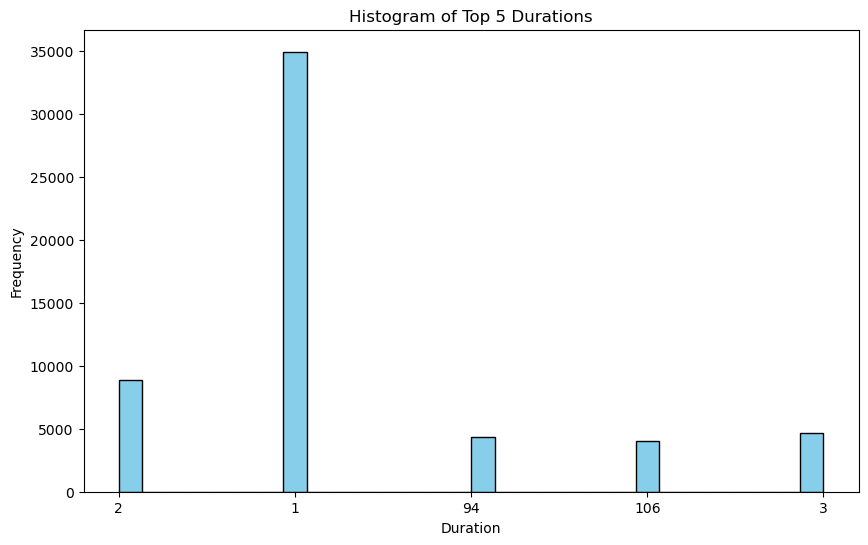

In [76]:
plt.figure(figsize=(10, 6))
plt.hist(filtered_data['duration_fixed'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.title('Histogram of Top 5 Durations')
plt.show()

#### Insight - The top 5 duration on Netflix were found to be 1,2,3,94 & 106.

In [77]:
df_dt[["duration_fixed"]].value_counts()

duration_fixed
1                 34961
2                  8865
3                  4665
94                 4343
106                4040
                  ...  
196                   4
18                    4
16                    4
20                    4
11                    2
Name: count, Length: 210, dtype: int64

### Bivariate Analysis

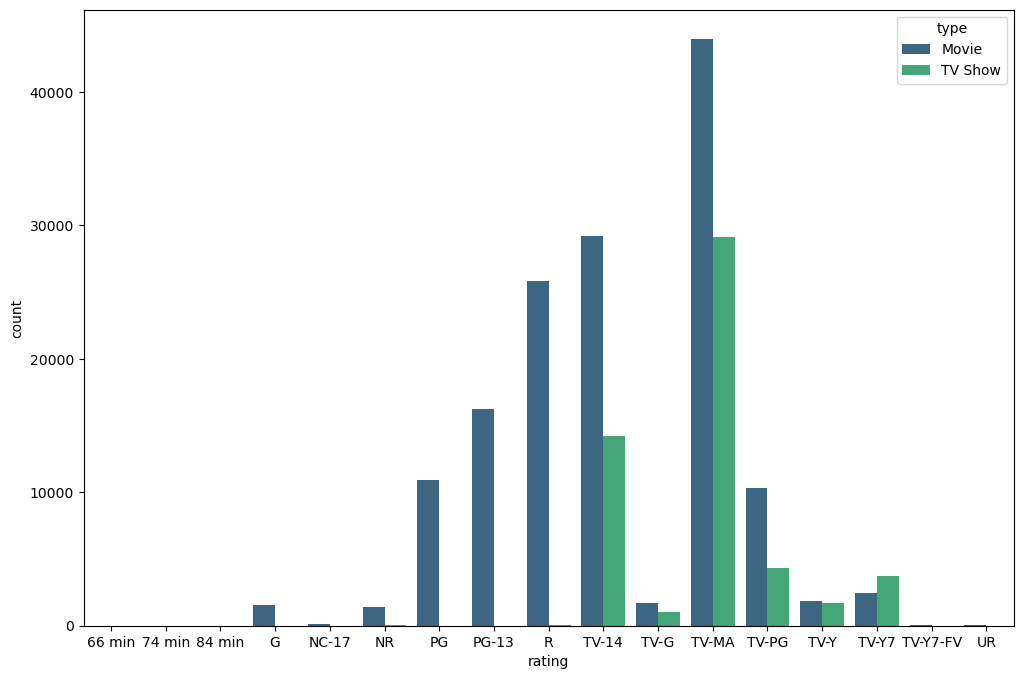

In [79]:
plt.figure(figsize=(12,8))
sns.countplot(x='rating',hue='type',data=df_final,palette = "viridis")
plt.show()

#### Insight - Netlix has maximum content of both Movies & TV shows in the TV-MA rating followed by TV-14 & R.

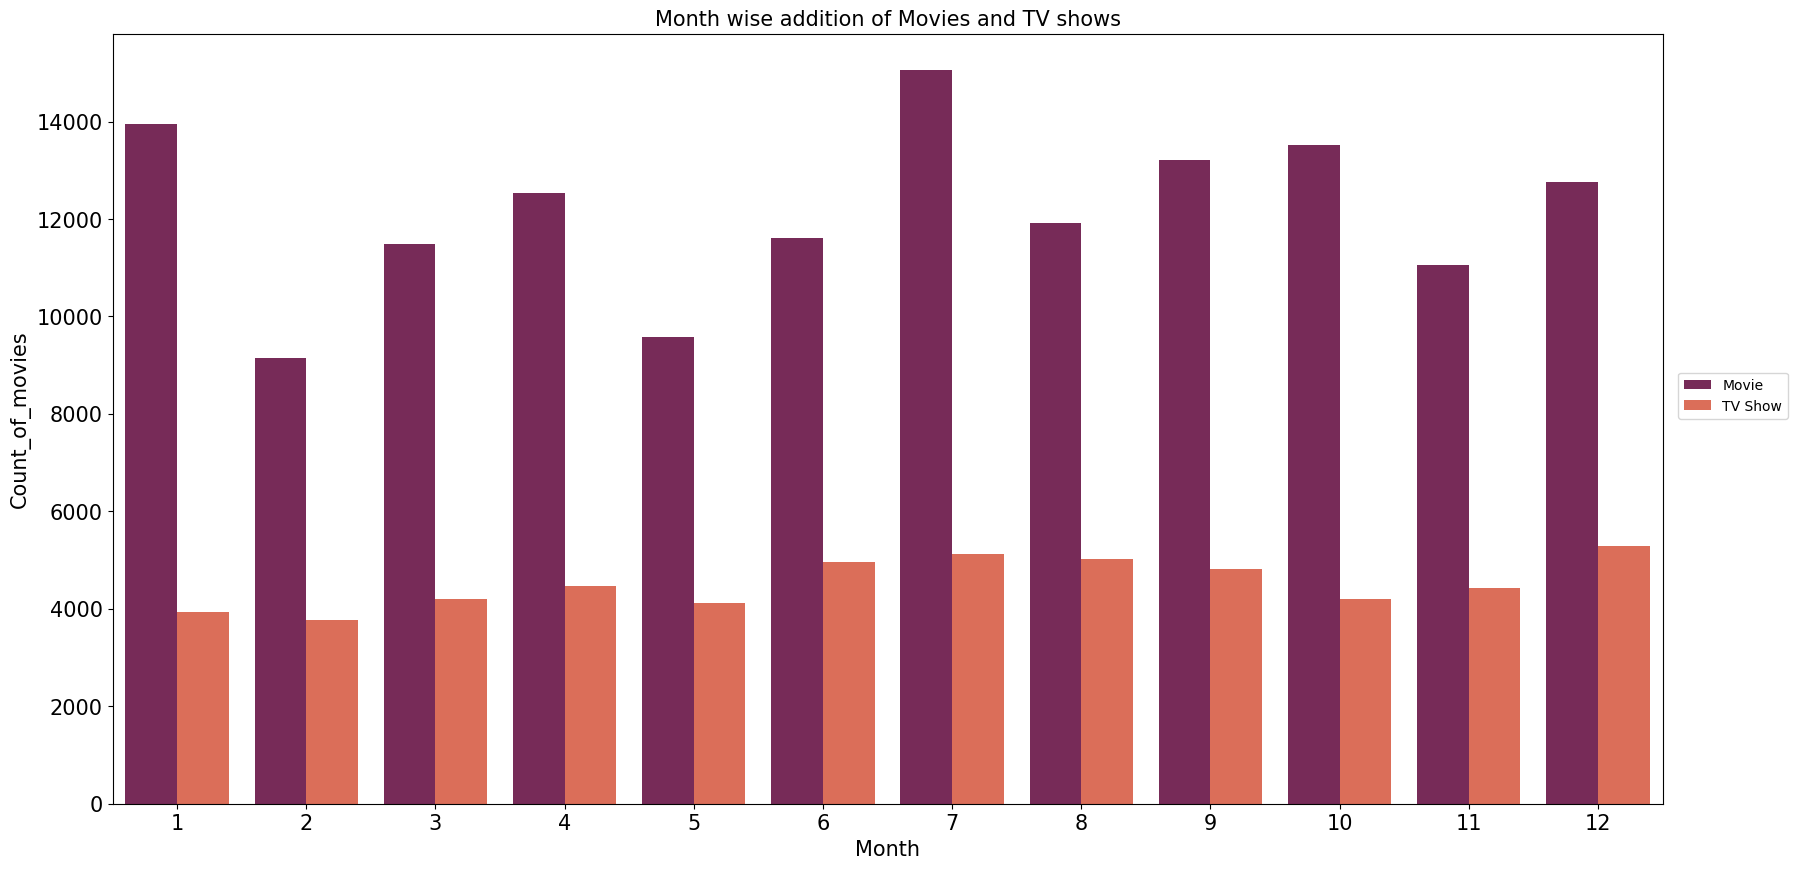

In [86]:
plt.figure(figsize=(20,10))
sns.countplot(x='month_added',data=df_dt,hue='type',palette = "rocket" )
plt.title('Month wise addition of Movies and TV shows',fontsize = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel(xlabel = "Month",fontsize = 15)
plt.ylabel(ylabel = "Count_of_movies",fontsize = 15)
plt.legend(loc=(1.01,0.5))
plt.show()

#### Insight- From the above countplot we found that most Movies & Tv shows were added on netflix in the month of july.

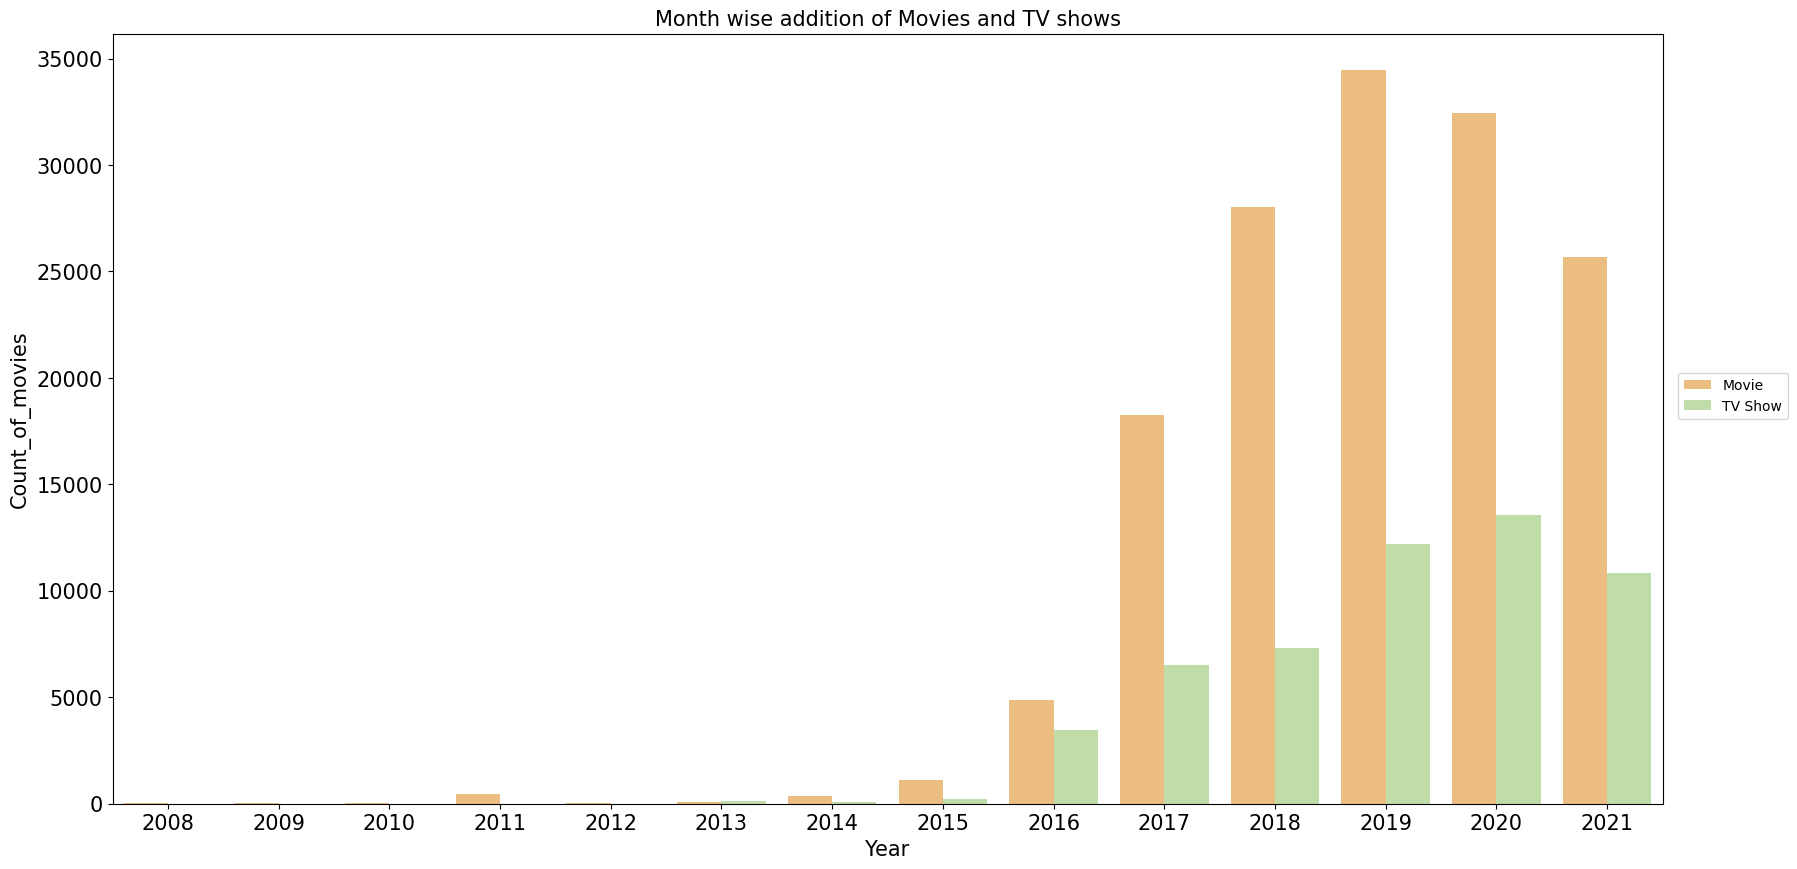

In [87]:
plt.figure(figsize=(20,10))
sns.countplot(x='year_added',data=df_dt,hue='type',palette = "Spectral")
plt.title('Month wise addition of Movies and TV shows',fontsize = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel(xlabel = "Year",fontsize = 15)
plt.ylabel(ylabel = "Count_of_movies",fontsize = 15)
plt.legend(loc=(1.01,0.5))
plt.show() 

#### Insight- From the above countplot we found that most Movies & TV shows were added on netflix in the year 2019.

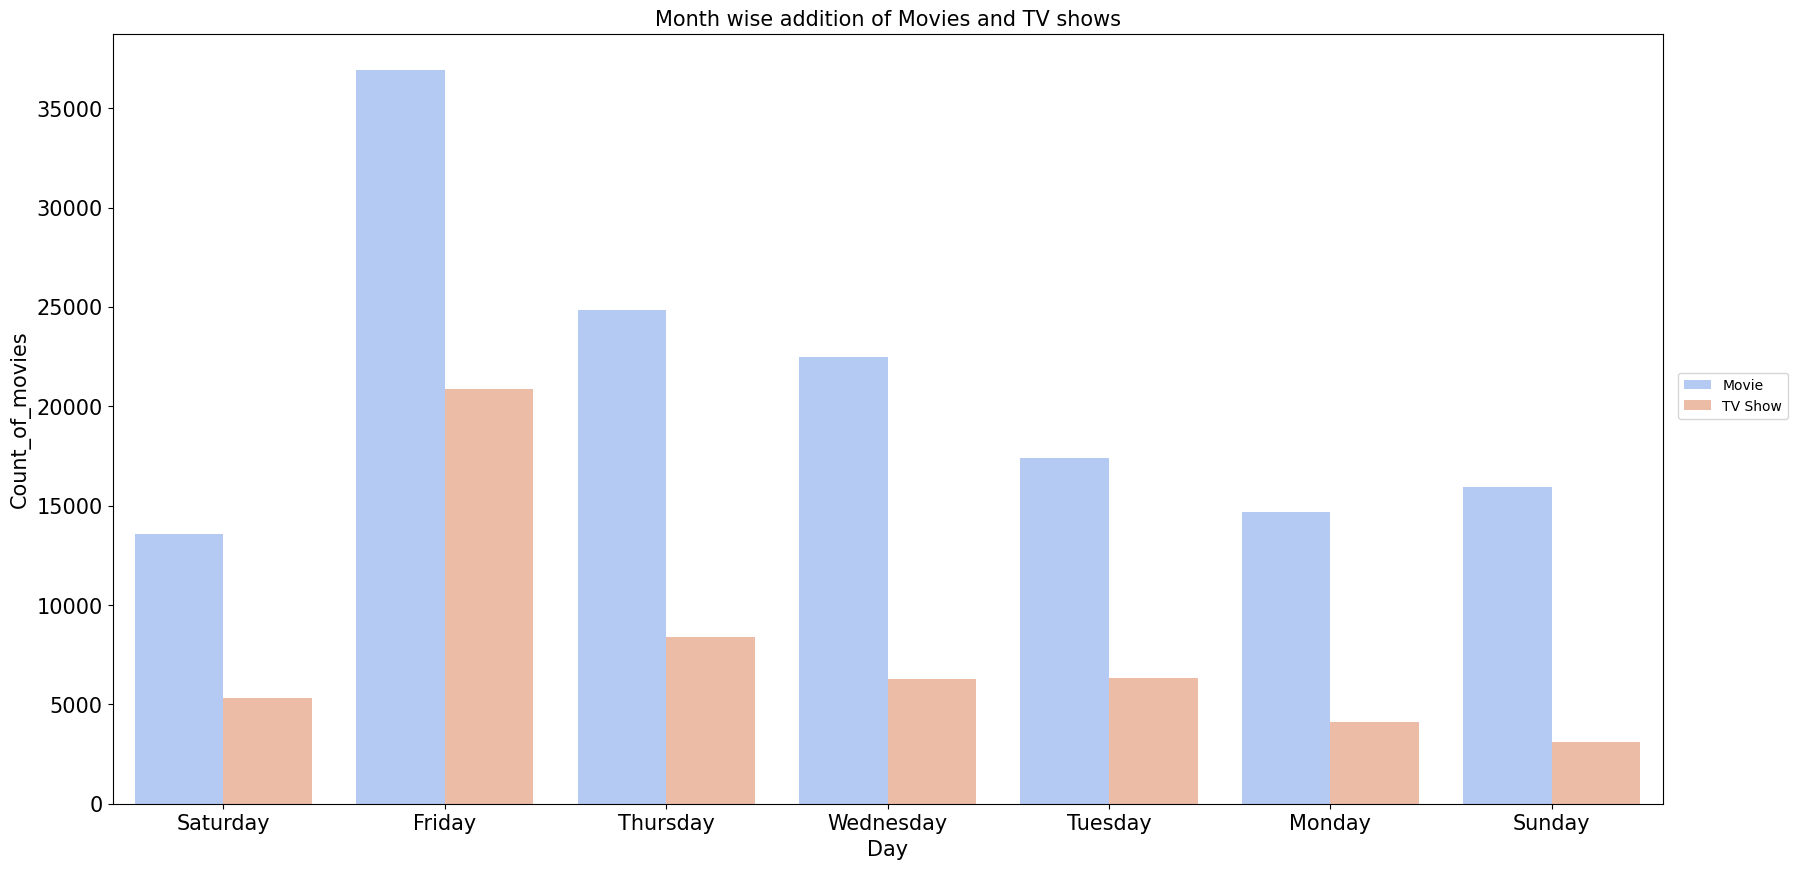

In [88]:
plt.figure(figsize=(20,10))
sns.countplot(x='day_added',data=df_dt,hue='type',palette = "coolwarm")
plt.title('Month wise addition of Movies and TV shows',fontsize = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel(xlabel = "Day",fontsize = 15)
plt.ylabel(ylabel = "Count_of_movies",fontsize = 15)
plt.legend(loc=(1.01,0.5))
plt.show()

#### Insight- From the above countplot we found that most Movies & Tv shows were added on netflix on friday.

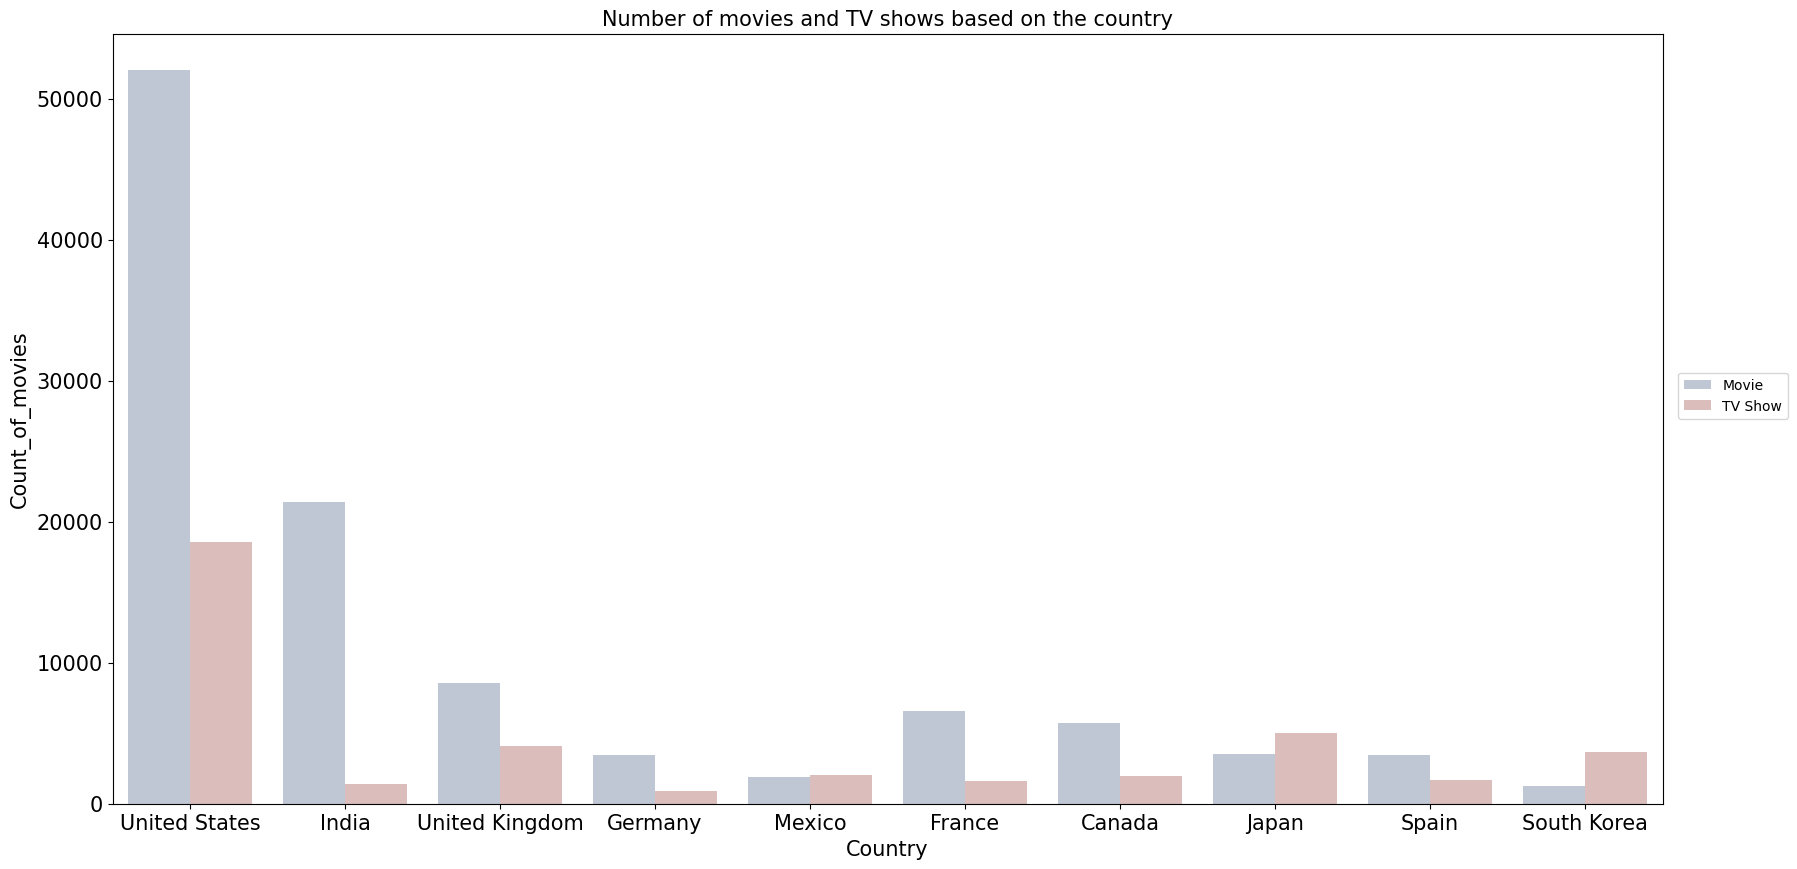

In [89]:
# Grouping the data by 'country' column and count the occurrences
country_counts = df_dt['country'].value_counts()

# Get the top 10 countries
top_10_countries = country_counts.head(10)

# Plotting
plt.figure(figsize=(20,10))
sns.countplot(x='country', data=df_dt[df_dt['country'].isin(top_10_countries.index)], hue='type',palette = "vlag" )
plt.title('Number of movies and TV shows based on the country', fontsize=15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel(xlabel = "Country",fontsize = 15)
plt.ylabel(ylabel = "Count_of_movies",fontsize = 15)
plt.legend(loc=(1.01, 0.5))
plt.show()


#### Insight- From the above analysis we found that most Movies & TV shows were added on netflix by the United States followed by India & United Kingdom.

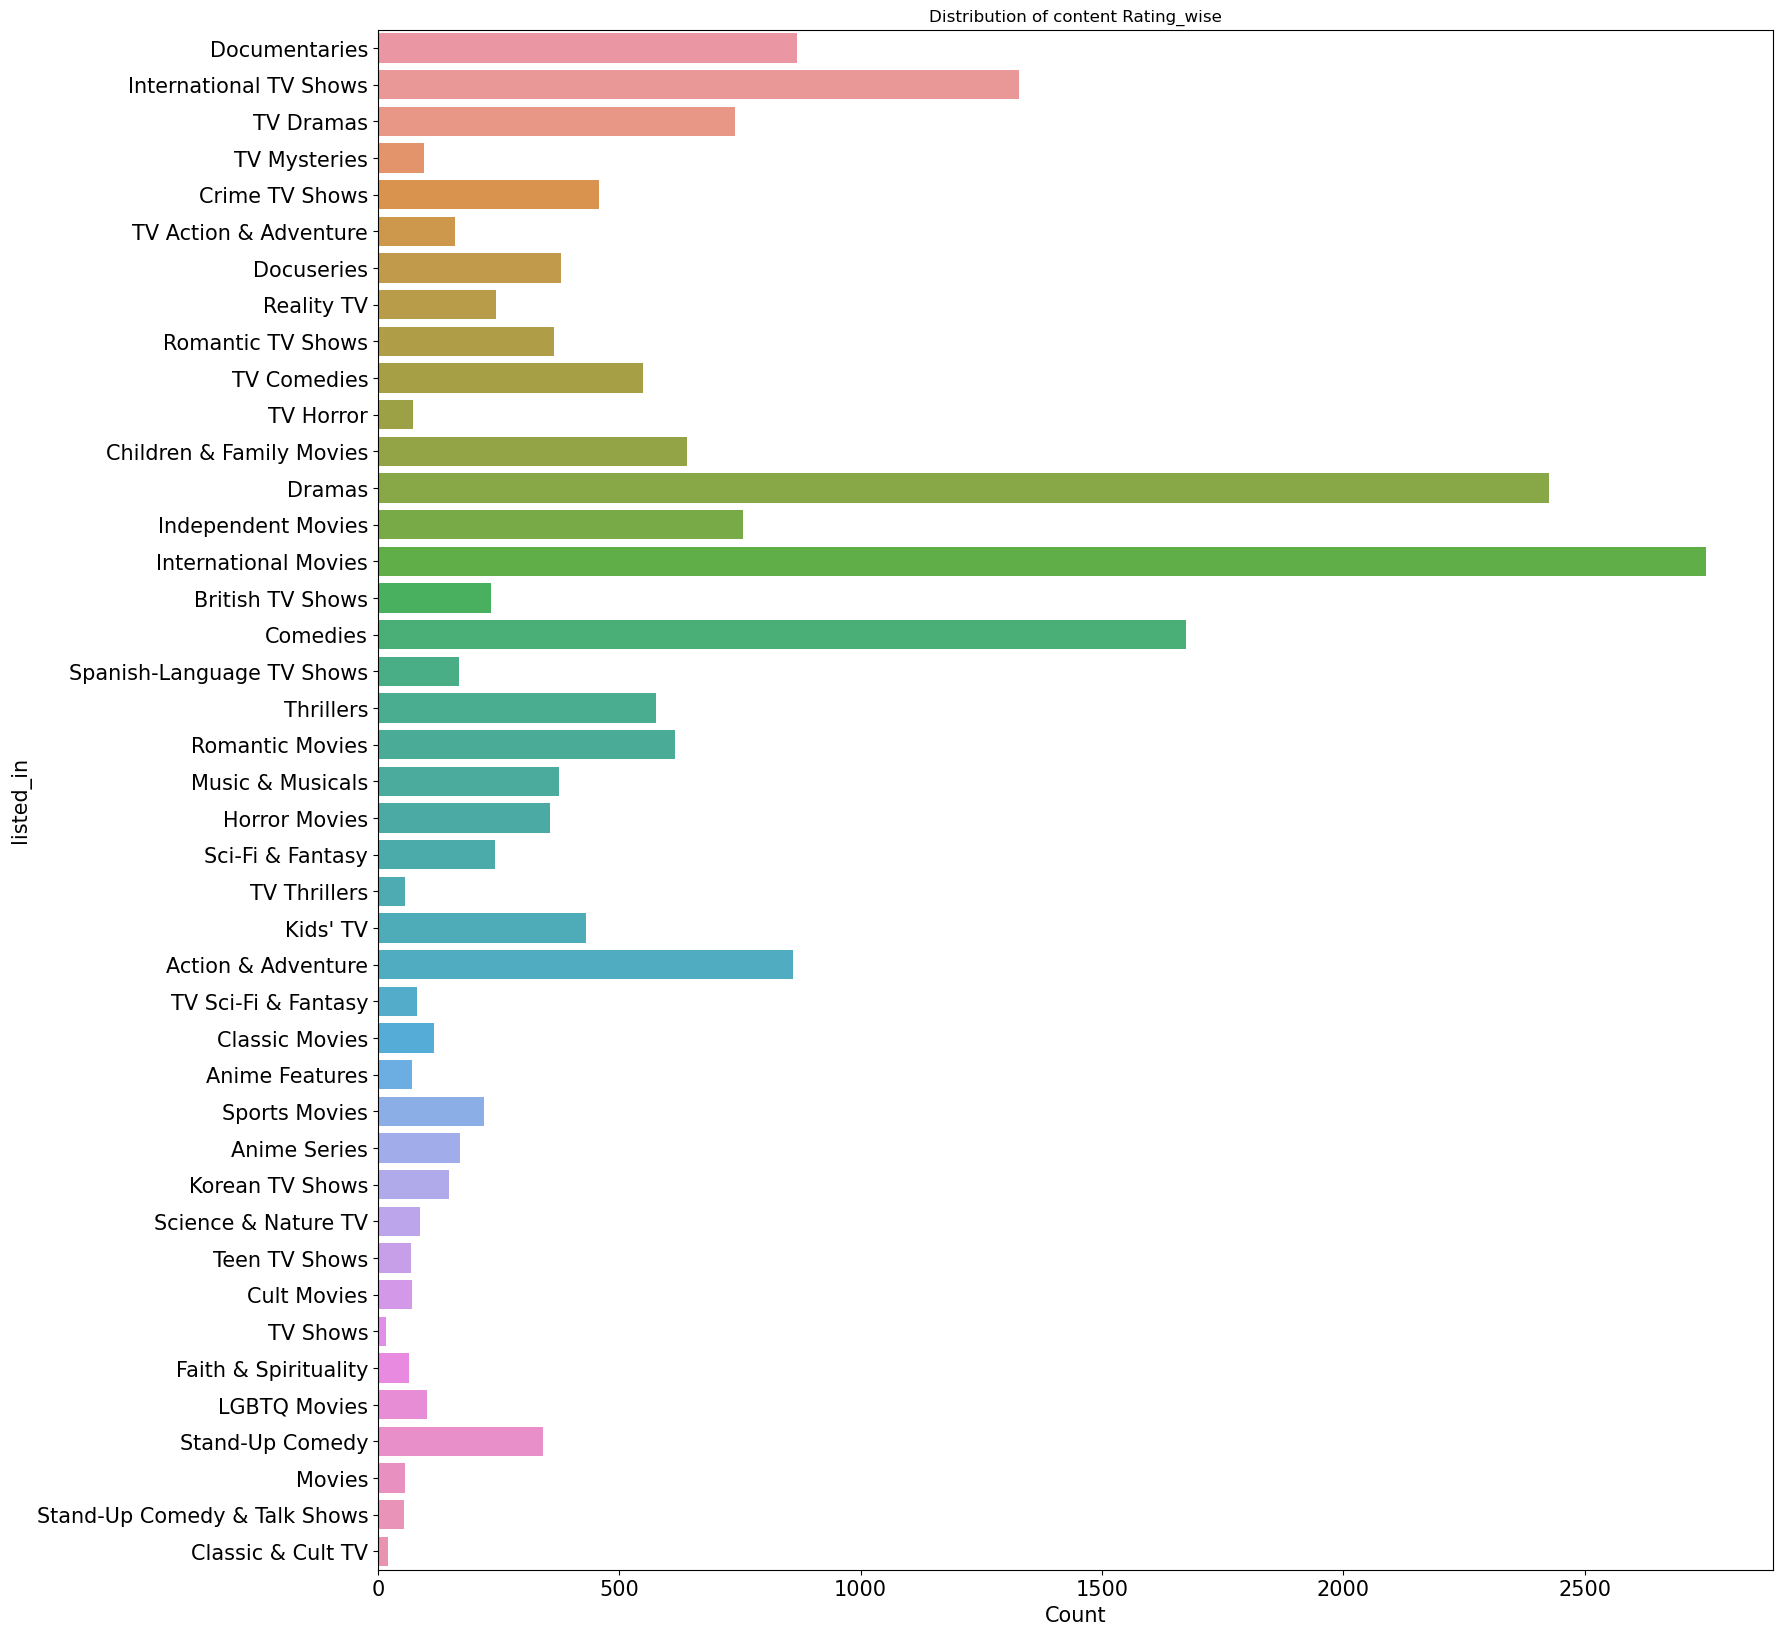

In [90]:
plt.figure(figsize = (18,20))
sns.countplot(y = "listed_in" , data =df_listed_in )
plt.title("Distribution of content Rating_wise")
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel(xlabel = "Count",fontsize = 15)
plt.ylabel(ylabel = "listed_in",fontsize = 15)
plt.show()


#### Insight- From the above countplot we found that most of the content was listed in International movies.

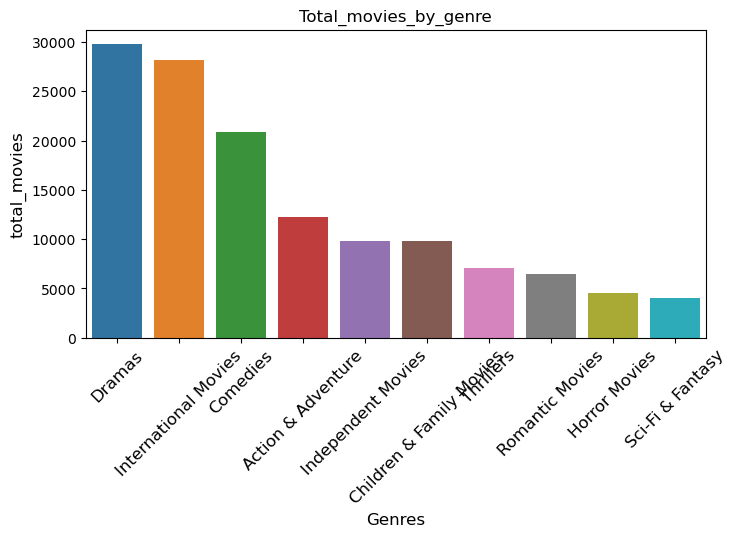

In [91]:
# Top 10 movies by genre
top_10_movie_genres = df_dt[df_dt['type'] == 'Movie'].listed.value_counts().head(10).index
df_movie = df_dt.loc[df_dt['listed'].isin(top_10_movie_genres)]
plt.figure(figsize= (8,4))
sns.countplot(data = df_movie , x = 'listed' , order = top_10_movie_genres)
plt.xticks(rotation = 45 , fontsize = 12)
plt.ylabel('total_movies' , fontsize = 12)
plt.xlabel('Genres' , fontsize = 12)
plt.title('Total_movies_by_genre')
plt.show()

#### Insight- Netflix has most movies in the genre Dramas followed by International movies & Comedies.

In [92]:
top_10_TV_genres = df_dt[df_dt['type'] == 'TV Show'].listed.value_counts().head(10).index
df_tv = df_dt.loc[df_dt['listed'].isin(top_10_TV_genres)]

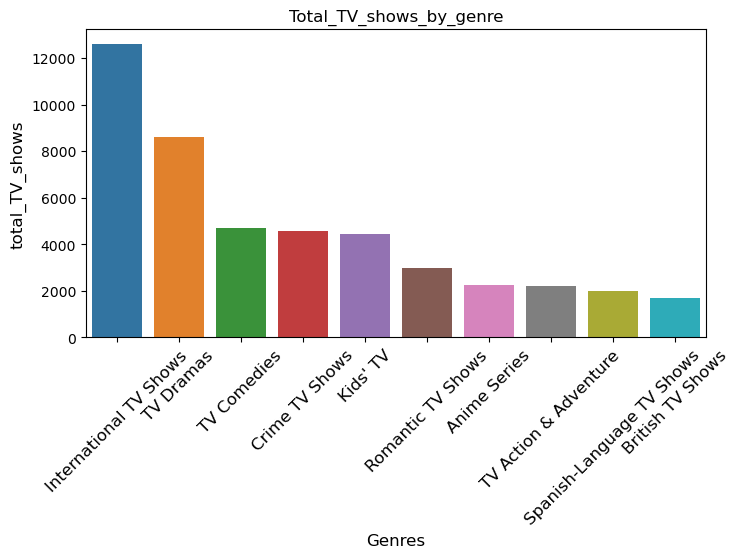

In [93]:
# Top 10 TV shows by genre
plt.figure(figsize= (8,4))
sns.countplot(data = df_tv , x = 'listed' , order = top_10_TV_genres)
plt.xticks(rotation = 45 , fontsize = 12)
plt.ylabel('total_TV_shows' , fontsize = 12)
plt.xlabel('Genres' , fontsize = 12)
plt.title('Total_TV_shows_by_genre')
plt.show()


#### Insight- Netflix has highest number of TV shows in the genre International TV shows followed by TV Dramas & TV Comedies.

In [94]:
# Group the data by 'cast' column and count the occurrences
cast_counts = df_dt['cast'].value_counts()

# Get the top 10 cast members
top_10_cast = cast_counts.head(10)

# Print or use top_10_cast for further analysis
print(top_10_cast)


cast
David Attenborough    2237
Liam Neeson            161
Alfred Molina          160
John Krasinski         138
Salma Hayek            130
Frank Langella         128
Anupam Kher            127
John Rhys-Davies       125
Shah Rukh Khan         108
Naseeruddin Shah       106
Name: count, dtype: int64


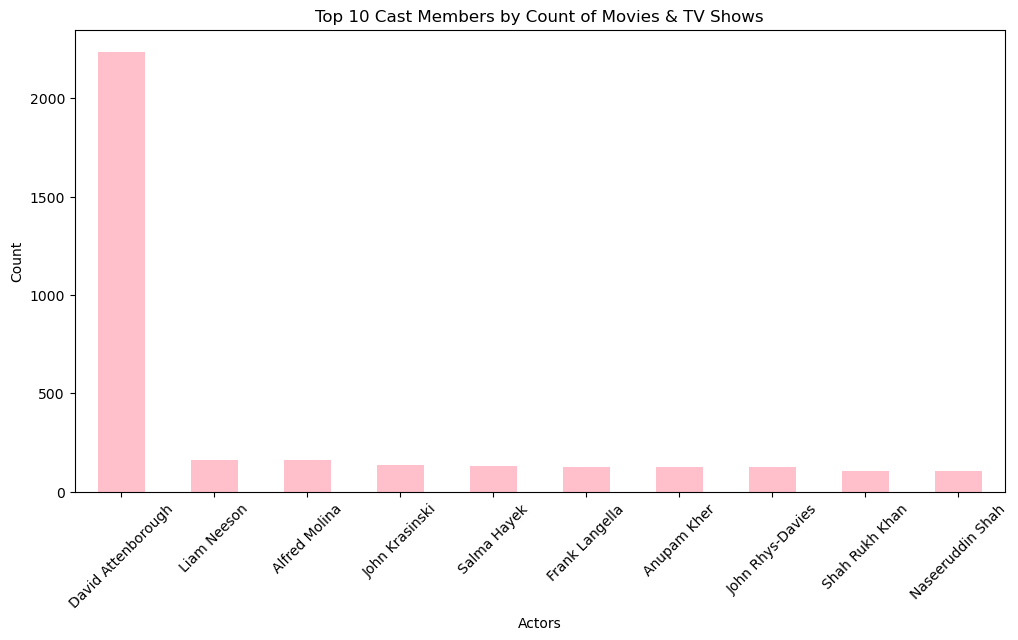

In [95]:
# Plotting
plt.figure(figsize=(12, 6))
top_10_cast.plot(kind='bar',color = "pink")
plt.xlabel('Actors')
plt.ylabel('Count')
plt.title('Top 10 Cast Members by Count of Movies & TV Shows')
plt.xticks(rotation=45)
plt.show()


#### Insight - The top most actor on Netflix was found to be David Attenborough.

In [96]:
# Group the data by 'director' column and count the occurrences
director_counts = df_dt['director'].value_counts()

# Get the top 10 cast members
top_10_director = director_counts.head(10)

# Print or use top_10_cast for further analysis
print(top_10_director)


director
Rajiv Chilaka          49059
Martin Scorsese          419
Youssef Chahine          409
Cathy Garcia-Molina      356
Steven Spielberg         355
Lars von Trier           336
Raja Gosnell             308
Tom Hooper               306
McG                      293
David Dhawan             270
Name: count, dtype: int64


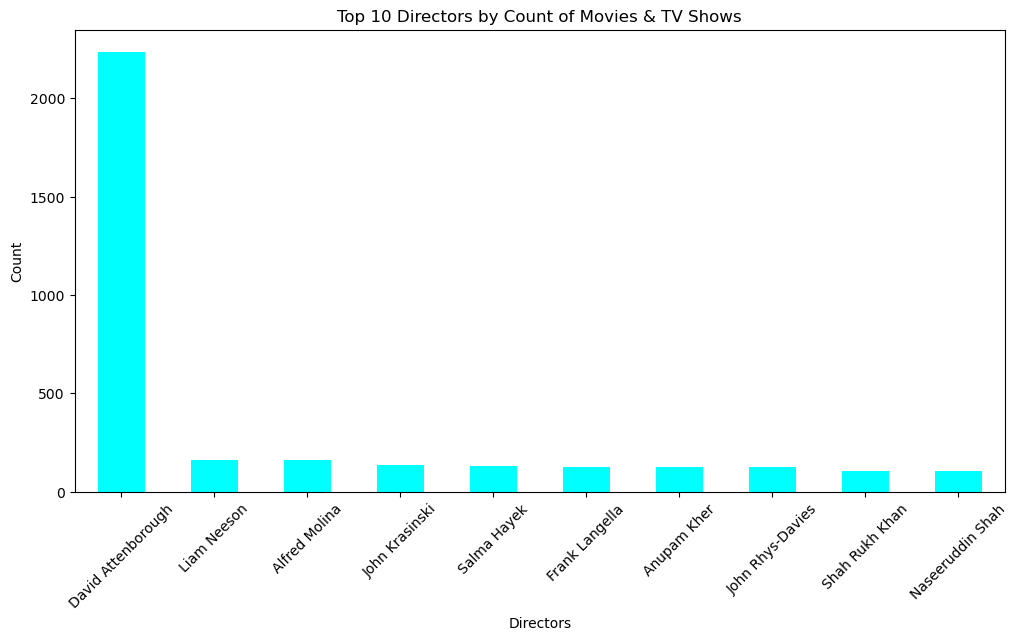

In [97]:
# Plotting
plt.figure(figsize=(12, 6))
top_10_cast.plot(kind='bar',color = "cyan")
plt.xlabel('Directors')
plt.ylabel('Count')
plt.title('Top 10 Directors by Count of Movies & TV Shows')
plt.xticks(rotation=45)
plt.show()


#### Insight - The top most director on Netflix was found to be Rajiv Chilaka .

In [98]:
# Group the data by 'title' column and count the occurrences
title_counts = df_dt['title'].value_counts()

# Get the top 10 titles
top_10_titles = title_counts.head(10)

# Print or use top_10_titles for further analysis
print(top_10_titles)


title
Kahlil Gibran's The Prophet    700
Holidays                       504
Movie 43                       468
The Eddy                       416
Narcos                         378
Cloud Atlas                    360
Sincerely Yours, Dhaka         330
Kon-Tiki                       300
Olmo & the Seagull             300
HALO Legends                   288
Name: count, dtype: int64


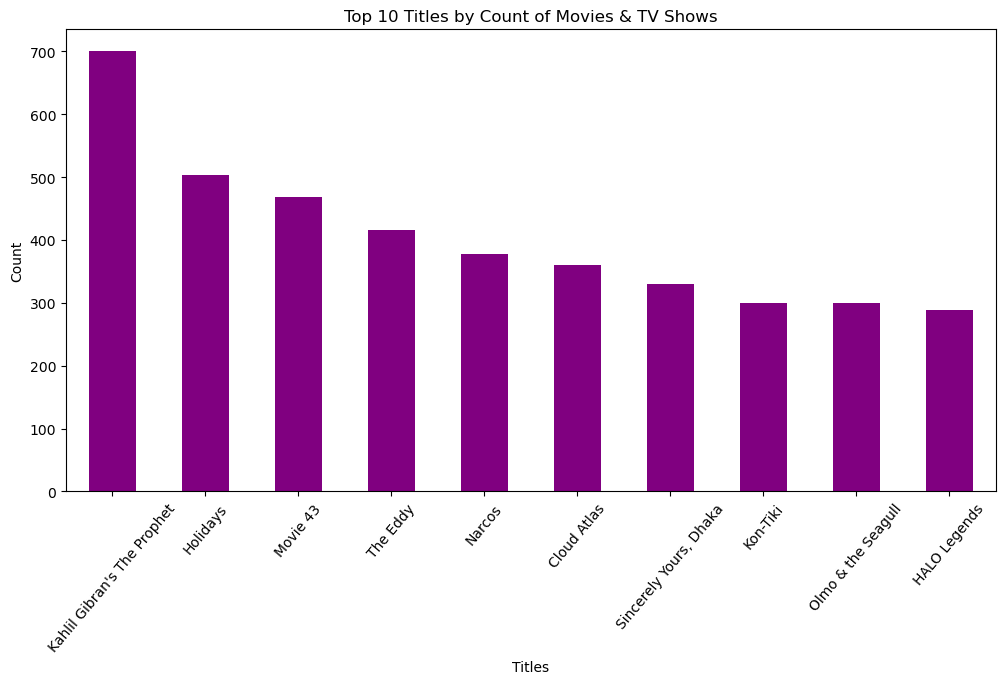

In [99]:
# Plotting
plt.figure(figsize=(12, 6))
top_10_titles.plot(kind='bar',color = "purple")
plt.xlabel('Titles')
plt.ylabel('Count')
plt.title('Top 10 Titles by Count of Movies & TV Shows')
plt.xticks(rotation=50)
plt.show()


#### Insight - The top title on netlfix was found to be Kahlil Gibran's The Prophet followed by Holidays & Movie 43.   


### Categorical Variables: Box Plot

<Axes: title={'center': 'Duration for Movies'}>

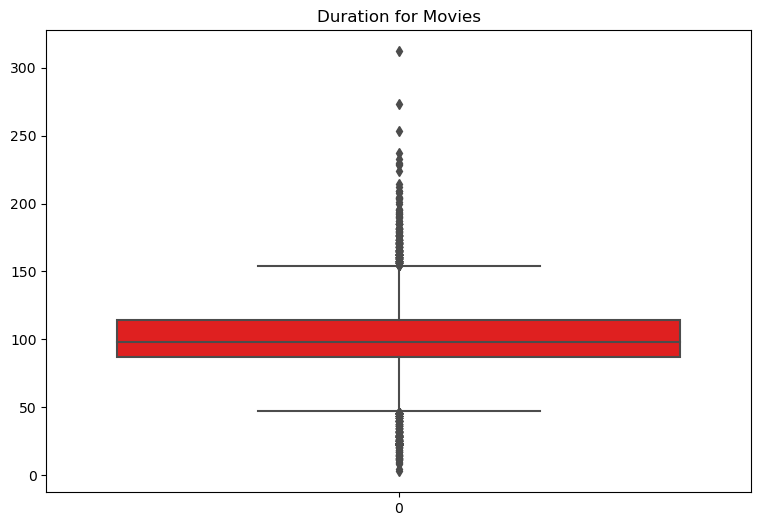

In [100]:
# Boxplot for duration of Movie
plt.figure(figsize=(20,6))
duration_df = df.loc[df.duration.str.contains("min")== True]['duration'].apply(lambda x: x.split()[0]).astype('Int64')
plt.subplot(1,2,1)
plt.title('Duration for Movies')
sns.boxplot(duration_df , color = "red")     

#### Insight - Average duration of movies are around 100 min.

## correlation

### Heatmap

In [101]:
top3_actors = df_dt["cast"].value_counts().index[:3]
top3_directors = df_dt["director"].value_counts().index[:3]
top3_titles = df_dt["title"].value_counts().index[:3]        

In [102]:
top3_actors

Index(['David Attenborough', 'Liam Neeson', 'Alfred Molina'], dtype='object', name='cast')

In [103]:
top3_directors

Index(['Rajiv Chilaka', 'Martin Scorsese', 'Youssef Chahine'], dtype='object', name='director')

In [104]:
top3_titles

Index(['Kahlil Gibran's The Prophet', 'Holidays', 'Movie 43'], dtype='object', name='title')

In [105]:
top3_data = df_dt.loc[
    (df_dt["cast"].isin(top3_actors))
    | (df_dt["director"].isin(top3_directors))
    | (df_dt["title"].isin(top3_titles))
]

In [106]:
top3_data


,show_id,title,type,date_added,rating,cast,director,country,listed,duration_fixed,release_year,year_added,month_added,day_added
0,s1,Dick Johnson Is Dead,Movie,2021-09-25,PG-13,David Attenborough,Kirsten Johnson,United States,Documentaries,90,2021,2021,9,Saturday
1,s2,Blood & Water,TV Show,2021-09-24,TV-MA,Ama Qamata,Rajiv Chilaka,South Africa,International TV Shows,2,2021,2021,9,Friday
2,s2,Blood & Water,TV Show,2021-09-24,TV-MA,Ama Qamata,Rajiv Chilaka,South Africa,TV Dramas,2,2021,2021,9,Friday
3,s2,Blood & Water,TV Show,2021-09-24,TV-MA,Ama Qamata,Rajiv Chilaka,South Africa,TV Mysteries,2,2021,2021,9,Friday
4,s2,Blood & Water,TV Show,2021-09-24,TV-MA,Khosi Ngema,Rajiv Chilaka,South Africa,International TV Shows,2,2021,2021,9,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200051,s8801,Zindagi Gulzar Hai,TV Show,2016-12-15,TV-PG,Hina Khawaja Bayat,Rajiv Chilaka,Pakistan,Romantic TV Shows,1,2016,2016,12,Thursday
200052,s8801,Zindagi Gulzar Hai,TV Show,2016-12-15,TV-PG,Hina Khawaja Bayat,Rajiv Chilaka,Pakistan,TV Dramas,1,2016,2016,12,Thursday
200119,s8804,Zombie Dumb,TV Show,2019-07-01,TV-Y7,David Attenborough,Rajiv Chilaka,United States,Kids' TV,2,2019,2019,7,Monday
200120,s8804,Zombie Dumb,TV Show,2019-07-01,TV-Y7,David Attenborough,Rajiv Chilaka,United States,Korean TV Shows,2,2019,2019,7,Monday


In [107]:
numerical_data = top3_data[["duration_fixed", "release_year", "year_added", "month_added"]]

In [108]:
numerical_data.corr()

,duration_fixed,release_year,year_added,month_added
duration_fixed,1.000000,-0.078737,-0.078737,-0.024168
release_year,-0.078737,1.000000,1.000000,-0.172114
year_added,-0.078737,1.000000,1.000000,-0.172114
month_added,-0.024168,-0.172114,-0.172114,1.000000


<Axes: >

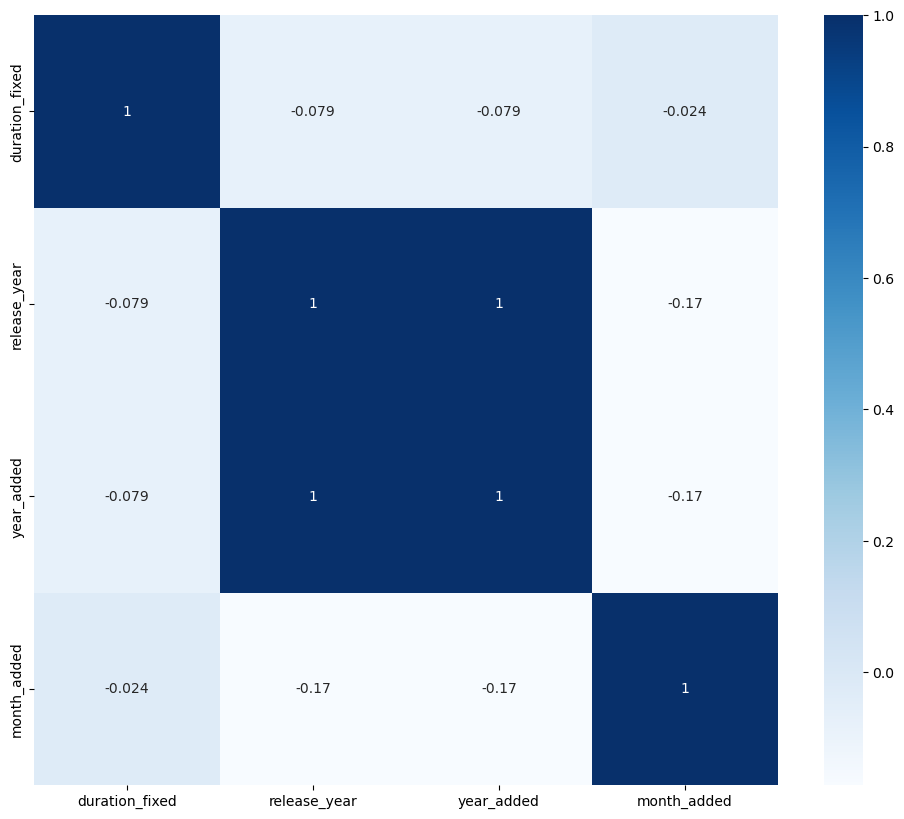

In [109]:
plt.figure(figsize = (12,10))
sns.heatmap(
    numerical_data.corr(),
    cmap = "Blues",
    annot = True
)


### pairplot

C:\Users\Hanna\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


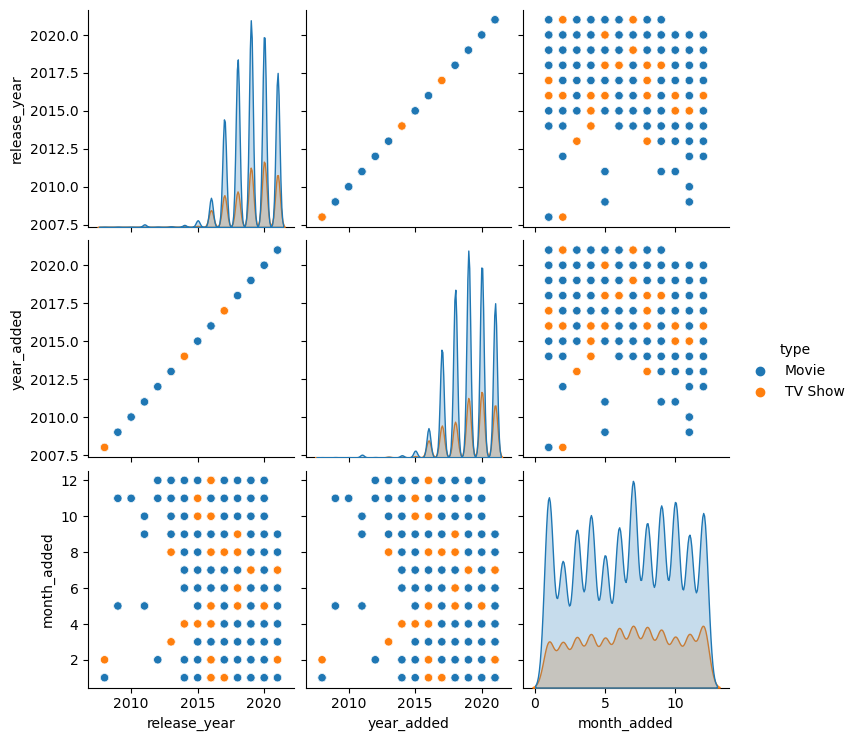

In [116]:
sns.pairplot(df_dt,hue = "type") 

# 5) Insights based on Non-Graphical and Visual Analysis

#### 
1) Our dataset contains a majority of movies (70.41%) compared to TV shows (29.59%).

2) The highest content rating on Netflix is TV-MA, indicating it is suitable for mature audiences and not suitable for children under 17.

3) Actor David Attenborough has the most extensive contribution to Netflix, creating a total of 836 movies and TV shows.

4) The top-rated movie on Netflix is "Kahlil Gibran's The Prophet".

5) Rajiv Chilaka is recognized as the top director on Netflix.

6) David Attenborough is the most prominent cast member featured in Netflix content.

7) The United States stands out as the leading country producing content on Netflix.

8) Netflix began its content journey on January 1, 2008, and the latest addition was made on September 25, 2021.

9) Netflix excels in genres like Dramas, International movies, and comedies, listed as the top three genres in their content offerings.

10) Friday and the month of July witnessed the highest influx of content additions on Netflix.

11) The year 2019 saw the maximum volume of content additions on Netflix.

12) The top five durations for Netflix content are 1, 2, 3, 94, and 106.

13) Netflix boasts the highest number of both movies and TV shows with a TV-MA rating.

14) Our analysis reveals that most movies and TV shows on Netflix originate from the United States, followed by India and the United Kingdom.

15) The majority of Netflix content falls under the category of International movies, as indicated by our countplot analysis.

16) Dramas are the predominant genre on Netflix, followed by International movies and Comedies.

17) In TV shows, Netflix offers a substantial number of International TV shows, followed by TV Dramas and TV Comedies.

18) The average duration of movies availa.verage duration of movies available on Netflix is around 100 minutes.

# 6) Business Insights 

#### 
1) Netflix predominantly features content released after 2000; older titles, especially pre-2000, are scarce. This gap presents an opportunity to cater to a senior audience demographic, a segment currently underserved by Netflix.

2) Over 80% of Netflix content falls under TV-MA (mature audiences, 17+), TV-14 (viewers 14+), TV-PG (parental guidance suggested, similar to PG-13 and PG), and R (restricted, not suitable for viewers under 17) ratings, targeting mature and adult viewers. The remaining 20% caters to children under 13 with parental guidance, highlighting Netflix's audience segmentation strategy.

3) Netflix's most popular genres include International Movies and TV Shows, Dramas, Comedies, Action & Adventure, and Children & Family Movies, with a growing preference for shorter content durations (75 to 150 minutes) and limited series (1 to 3 seasons). This trend should influence future content production.

4) Approximately 75% of Netflix's content originates from the top 10 countries, indicating a concentrated content source. To expand its global reach and business growth, Netflix should consider diversifying by focusing on content from more countries worldwide.

5) A decline in content production across all countries and genres was observed in 2020 and 2021, potentially due to the pandemic's impact. This trend underscores the need for adaptive strategies to navigate challenges and maintain a steady content flow during unforeseen circumst

6) Netflix primarily releases new content on Fridays, with a notable influx during the month of June and the entire year of 2019. This pattern indicates strategic scheduling, capitalizing on specific days and periods to engage viewers and maximize audience impact.

# 7) Recommendations 

#### 
1) Netflix contains majority of movies (70.41%) compared to TV shows (29.59%) based on this insight we can recommend netflix to add movies than TV shows.
2) Netflix excels in genres like Dramas, International movies, and comedies, listed as the top three genres in their content offerings so netflix should make more content based on these genres.
3) There are more content in the rating TV-MA that is for adult audience, netflix should Produce animated movies, family-friendly series, and educational content for children. Engaging shows that are both entertaining and educational can attract families and younger audiences.
4) Customize marketing campaigns based on cultural nuances and local trends in each country. Engage with local influencers and celebrities to promote Netflix content. Tailor promotional activities to align with regional festivities and events, creating a sense of community and excitement around new releases.
5) More content should addded which have the top actor - David Attenborough & top director - Rajiv Chilaka pair.
6) Create compelling original stories that haven not been explored before. Unique narratives and fresh perspectives can captivate viewers and set Netflix apart from other platforms.
7) Address important social issues like gender equality, mental health, environmental conservation, and social justice. Thought-provoking content can spark conversations and raise awareness among viewers.
8) While emphasizing popular genres, also explore niche genres and subcultures specific to each country. By diversifying content offerings, Netflix can attract niche audiences and create a dedicated fan base, enhancing viewer loyalty and subscription retention.
9) Align content releases with local cultural events, holidays, and festivities. Utilize insights on peak viewing times in each country to schedule releases for maximum impact. Plan promotional campaigns around these events to create buzz and anticipation among viewers.
10) Acknowledge the preference for shorter content durations and limited series. Develop a mix of short films, mini-series, and full-length features to cater to different viewer schedules and attention spans. Experiment with interactive formats to enhance viewer engagement.